# Neutral mutations

## Format the data appropriately for arsenic

In [6]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [7]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [8]:
title_pairs = [["T42A", "A42T"], ["Y29A", "A29Y"], ["W38F", "F38W"], ["W44F", "F44W"], ["Y29F", "F29Y"]]
# title_pairs = [["T42A", "-(A42T)"], ["Y29A", "-(A29Y)"], ["W44F", "-(F44W)"], ["Y29F", "-(F29Y)"]]
dir_num = 13
subdirs = [6, 40, 42, 44, 46]
# subdirs = [6, 40, 44, 46]
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
            binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
    to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [9]:
to_plot

[['T42', 'A42', 2.477576613515086, 0.14492840367315213, 0.2920669051269775],
 ['A42', 'T42', -2.590320704385701, 0.13879045321995792, 0.2906051962710605],
 ['Y29', 'A29', 3.213569695172239, 0.2629590703701337, 0.37415227094433945],
 ['A29', 'Y29', -3.4108574742178224, 0.28930070721873474, 0.4664839552150175],
 ['W38', 'F38', 0.7125047546581155, 0.20221619263104568, 0.46123631022223166],
 ['F38', 'W38', -0.9759674389580579, 0.1534130667812866, 0.33815622369491805],
 ['W44', 'F44', 0.7481630130489529, 0.19140751602032208, 0.3468537161797291],
 ['F44', 'W44', -1.017485892358952, 0.1780537245068998, 0.30790979097342874],
 ['Y29', 'F29', 0.9454903877896373, 0.04849486028473315, 0.09933740478934017],
 ['F29', 'Y29', -1.0369974565312157, 0.05394165116050055, 0.11880058735782817]]

In [10]:
d = {'WT': 19.0, 'F29': 19.1, 'A29': 15.6, 'F38': 17.4, 'A42': 17.2, 'F44': 19.0}

In [16]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['T42', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['Y29', d['WT']*-1, 0])
        experiment.append(['W38', d['WT']*-1, 0])
        experiment.append(['W44', d['WT']*-1, 0])
        experiment.append(['Y29', d['WT']*-1, 0])
    else:
        experiment.append([k, d[k]*-1, 0])

In [17]:
experiment

[['T42', -19.0, 0],
 ['Y29', -19.0, 0],
 ['W38', -19.0, 0],
 ['W44', -19.0, 0],
 ['Y29', -19.0, 0],
 ['F29', -19.1, 0],
 ['A29', -15.6, 0],
 ['F38', -17.4, 0],
 ['A42', -17.2, 0],
 ['F44', -19.0, 0]]

In [18]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_neutral.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


## Make arsenic plot

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [2]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_neutral.csv')

Graph is not connected enough to compute absolute values


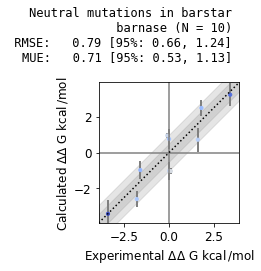

In [6]:
plotting.plot_DDGs(fe.graph,target_name='barnase', title='Neutral mutations in barstar', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_neutral.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version

# Charge mutations

## Format the data appropriately for arsenic

In [8]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [9]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [10]:
title_pairs = [["D35A", "A35D"], ["D39A", "A39D"], ["E76A", "A76E"], ["E80A", "A80E"], ["K27A", "A27K"], ["R59A", "A59R"], ["R83Q", "Q83R"], ["R87A", "A87R"]]
dir_num = 13
subdirs = list(range(48, 64, 2))
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
            binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
    to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [11]:
to_plot

[['D35', 'A35', 3.336126966130085, 0.2511789244260599, 0.7054776334808279],
 ['A35', 'D35', -3.7979227708927055, 0.2858339065570484, 0.6565755680220238],
 ['D39', 'A39', 13.50881708891592, 0.640085917106573, 2.243367013037025],
 ['A39', 'D39', -13.18653328570488, 0.4644718961232288, 1.1255460205614227],
 ['E76', 'A76', 1.5591722615276042, 0.11075527442687495, 0.1928633442989427],
 ['A76', 'E76', -1.6660112550071136, 0.12398704106335039, 0.24645650791359963],
 ['E80', 'A80', 0.10775849655404286, 0.1285283470962356, 0.24395328749482975],
 ['A80',
  'E80',
  -0.11109210962877476,
  0.10625676116493013,
  0.22859718966659487],
 ['K27', 'A27', 3.3004432011463796, 0.4584080754738466, 0.8239359870664225],
 ['A27', 'K27', -8.429294297039647, 0.6458849033151096, 1.6060259137897255],
 ['R59', 'A59', 5.308221292831896, 0.24200753465869776, 0.5847513067634669],
 ['A59', 'R59', -3.561116265242985, 0.1746623462217113, 0.4588809816285142],
 ['R83', 'Q83', 12.50819032080307, 0.642340268994055, 2.37726

In [12]:
d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5}

In [13]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['K27', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['R59', d['WT']*-1, 0])
        experiment.append(['R83', d['WT']*-1, 0])
        experiment.append(['R87', d['WT']*-1, 0])
        experiment.append(['D35', d['WT']*-1, 0])
        experiment.append(['D39', d['WT']*-1, 0])
        experiment.append(['E76', d['WT']*-1, 0])
        experiment.append(['E80', d['WT']*-1, 0])
    else:
        experiment.append([k, d[k]*-1, 0])

In [14]:
experiment

[['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0]]

In [15]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_charge.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [18]:
experiment + to_plot

[['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0],
 ['D35', 'A35', 3.336126966130085, 0.2511789244260599, 0.7054776334808279],
 ['A35', 'D35', -3.7979227708927055, 0.2858339065570484, 0.6565755680220238],
 ['D39', 'A39', 13.50881708891592, 0.640085917106573, 2.243367013037025],
 ['A39', 'D39', -13.18653328570488, 0.4644718961232288, 1.1255460205614227],
 ['E76', 'A76', 1.5591722615276042, 0.11075527442687495, 0.1928633442989427],
 ['A76', 'E76', -1.6660112550071136, 0.12398704106335039, 0.24645650791359963],
 ['E80', 'A80', 0.10775849655404286, 0.1285283470962356, 0.24395328749482975],
 ['A80',
  'E80',
  -0.11109210962877476,
  0.10625676116493013,
  0.22859718966659487],
 ['K27', 'A27', 3.3004432011463796, 0.4584080754

## Make arsenic plot

In [16]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [47]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge.csv')

Graph is not connected enough to compute absolute values


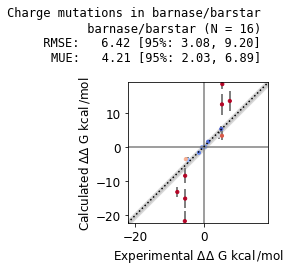

In [48]:
plotting.plot_DDGs(fe.graph,target_name='barnase/barstar', title='Charge mutations in barnase/barstar', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version

# Charge negative mutations

## Format the data appropriately for arsenic

In [21]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [22]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [23]:
title_pairs = [["D35A", "A35D"], ["D39A", "A39D"], ["E76A", "A76E"], ["E80A", "A80E"]]
dir_num = 13
subdirs = list(range(48, 56, 2))
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
            binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
    to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [24]:
to_plot

[['D35', 'A35', 3.336126966130085, 0.2511789244260599, 0.7054776334808279],
 ['A35', 'D35', -3.7979227708927055, 0.2858339065570484, 0.6565755680220238],
 ['D39', 'A39', 13.50881708891592, 0.640085917106573, 2.243367013037025],
 ['A39', 'D39', -13.18653328570488, 0.4644718961232288, 1.1255460205614227],
 ['E76', 'A76', 1.5591722615276042, 0.11075527442687495, 0.1928633442989427],
 ['A76', 'E76', -1.6660112550071136, 0.12398704106335039, 0.24645650791359963],
 ['E80', 'A80', 0.10775849655404286, 0.1285283470962356, 0.24395328749482975],
 ['A80',
  'E80',
  -0.11109210962877476,
  0.10625676116493013,
  0.22859718966659487]]

In [25]:
d = {'WT': 19.0, 'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5}

In [26]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
#         experiment.append(['K27', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
#         experiment.append(['R59', d['WT']*-1, 0])
#         experiment.append(['R83', d['WT']*-1, 0])
#         experiment.append(['R87', d['WT']*-1, 0])
        experiment.append(['D35', d['WT']*-1, 0])
        experiment.append(['D39', d['WT']*-1, 0])
        experiment.append(['E76', d['WT']*-1, 0])
        experiment.append(['E80', d['WT']*-1, 0])
    else:
        experiment.append([k, d[k]*-1, 0])

In [27]:
experiment

[['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0]]

In [28]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_charge_negative.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [29]:
experiment + to_plot

[['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0],
 ['D35', 'A35', 3.336126966130085, 0.2511789244260599, 0.7054776334808279],
 ['A35', 'D35', -3.7979227708927055, 0.2858339065570484, 0.6565755680220238],
 ['D39', 'A39', 13.50881708891592, 0.640085917106573, 2.243367013037025],
 ['A39', 'D39', -13.18653328570488, 0.4644718961232288, 1.1255460205614227],
 ['E76', 'A76', 1.5591722615276042, 0.11075527442687495, 0.1928633442989427],
 ['A76', 'E76', -1.6660112550071136, 0.12398704106335039, 0.24645650791359963],
 ['E80', 'A80', 0.10775849655404286, 0.1285283470962356, 0.24395328749482975],
 ['A80',
  'E80',
  -0.11109210962877476,
  0.10625676116493013,
  0.22859718966659487]]

## Make arsenic plot

In [16]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [49]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge_negative.csv')

Graph is not connected enough to compute absolute values


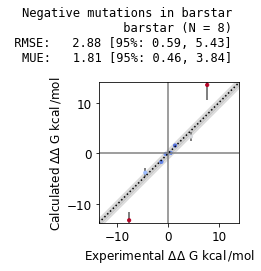

In [50]:
plotting.plot_DDGs(fe.graph,target_name='barstar', title='Negative mutations in barstar', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge_negative.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version

# Charge positive mutations

## Format the data appropriately for arsenic

In [32]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [33]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [35]:
title_pairs = [["K27A", "A27K"], ["R59A", "A59R"], ["R83Q", "Q83R"], ["R87A", "A87R"]]
dir_num = 13
subdirs = list(range(56, 64, 2))
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
            binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
    to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [36]:
to_plot

[['K27', 'A27', 3.3004432011463796, 0.4584080754738466, 0.8239359870664225],
 ['A27', 'K27', -8.429294297039647, 0.6458849033151096, 1.6060259137897255],
 ['R59', 'A59', 5.308221292831896, 0.24200753465869776, 0.5847513067634669],
 ['A59', 'R59', -3.561116265242985, 0.1746623462217113, 0.4588809816285142],
 ['R83', 'Q83', 12.50819032080307, 0.642340268994055, 2.377266348254617],
 ['Q83', 'R83', -15.118123799814818, 0.7347551574745863, 2.0596550021027795],
 ['R87', 'A87', 18.45807266893262, 0.6322535940739887, 0.9252355376168637],
 ['A87', 'R87', -21.72388786195302, 0.70310138357035, 2.36187941384755]]

In [37]:
d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5}

In [38]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['K27', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['R59', d['WT']*-1, 0])
        experiment.append(['R83', d['WT']*-1, 0])
        experiment.append(['R87', d['WT']*-1, 0])
#         experiment.append(['D35', d['WT']*-1, 0])
#         experiment.append(['D39', d['WT']*-1, 0])
#         experiment.append(['E76', d['WT']*-1, 0])
#         experiment.append(['E80', d['WT']*-1, 0])
    else:
        experiment.append([k, d[k]*-1, 0])

In [39]:
experiment

[['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0]]

In [40]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_charge_positive.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [41]:
experiment + to_plot

[['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['K27', 'A27', 3.3004432011463796, 0.4584080754738466, 0.8239359870664225],
 ['A27', 'K27', -8.429294297039647, 0.6458849033151096, 1.6060259137897255],
 ['R59', 'A59', 5.308221292831896, 0.24200753465869776, 0.5847513067634669],
 ['A59', 'R59', -3.561116265242985, 0.1746623462217113, 0.4588809816285142],
 ['R83', 'Q83', 12.50819032080307, 0.642340268994055, 2.377266348254617],
 ['Q83', 'R83', -15.118123799814818, 0.7347551574745863, 2.0596550021027795],
 ['R87', 'A87', 18.45807266893262, 0.6322535940739887, 0.9252355376168637],
 ['A87', 'R87', -21.72388786195302, 0.70310138357035, 2.36187941384755]]

## Make arsenic plot

In [16]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [51]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge_positive.csv')

Graph is not connected enough to compute absolute values


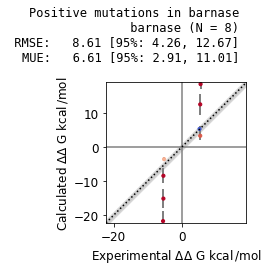

In [52]:
plotting.plot_DDGs(fe.graph,target_name='barnase', title='Positive mutations in barnase', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge_positive.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version